# Analyse exploratoire des Bonus/Malus et de la Capacité de Remboursement

Ce Notebook contient une analyse exploratoire des données après la phase d'implémentation des Bonus/Malus (`bonus_malus_data` et `updated_loans_data`).

Nous allons examiner les caractéristiques principales des données, visualiser les répartitions et identifier les tendances pertinentes.

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Définir le chemin des données
bonus_malus_file = "../data/processed/final_clients_with_bonus_malus.csv"
updated_loans_file = "../data/processed/final_clients_with_updated_loans.csv"

# Charger les données
bonus_malus_data = pd.read_csv(bonus_malus_file)
updated_loans_data = pd.read_csv(updated_loans_file)

# Afficher les premières lignes des fichiers chargés
print("Données Bonus/Malus :")
display(bonus_malus_data.head())


Données Bonus/Malus :


,DATE_OF_THE_DAY,SIM_NUMBER,HAS_USED_MOB_MONEY_IN_LAST_30_DAYS,HAS_USED_MOB_MONEY_IN_LAST_7_DAYS,HAS_USED_MOB_MONEY_IN_LAST_90_DAYS,PAID_DATA_VOLUME,PAID_VOICE_TRAFFIC,HAS_USED_MOB_MONEY_IN_LAST_1_DAY,VOICE_REVENUE,DATA_REVENUE,...,Weighted_Score,Segment,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over,Balance_First,Balance_Second,Repayment_Label,Bonus_Malus
0,20230918,C1850294050,1,1,1,1551.85,1311.07,1,486.81,115.21,...,39,Very Low,30.000000,260.000000,NaN,NaN,NaN,NaN,Uncertain,0.0
1,20231029,C2042071881,0,1,1,4759.05,267.29,1,77.07,110.88,...,49,High,34.166667,326.666667,NaN,NaN,NaN,NaN,Uncertain,0.0
2,20231102,C1001545517,0,1,1,4813.52,24.33,0,83.86,7.84,...,49,High,34.166667,326.666667,NaN,NaN,NaN,NaN,Uncertain,0.0
3,20231126,C1204243390,0,1,1,734.09,1018.34,0,284.10,18.31,...,41,Very Low,30.833333,273.333333,NaN,NaN,NaN,NaN,Uncertain,0.0
4,20230801,C913434705,1,1,1,2166.61,255.10,1,464.50,120.56,...,45,Medium,NaN,NaN,137.5,300.0,NaN,NaN,Uncertain,0.0


In [3]:
print("Données des Montants de Crédits Mis à Jour :")
display(updated_loans_data.head())

Données des Montants de Crédits Mis à Jour :


,DATE_OF_THE_DAY,SIM_NUMBER,HAS_USED_MOB_MONEY_IN_LAST_30_DAYS,HAS_USED_MOB_MONEY_IN_LAST_7_DAYS,HAS_USED_MOB_MONEY_IN_LAST_90_DAYS,PAID_DATA_VOLUME,PAID_VOICE_TRAFFIC,HAS_USED_MOB_MONEY_IN_LAST_1_DAY,VOICE_REVENUE,DATA_REVENUE,...,Macro_Loan,Cash_Roller_Over,Balance_First,Balance_Second,Repayment_Label,Bonus_Malus,Nano_Loan_updated,Advanced_Credit_updated,Macro_Loan_updated,Cash_Roller_Over_updated
0,20230918,C1850294050,1,1,1,1551.85,1311.07,1,486.81,115.21,...,NaN,NaN,NaN,NaN,Uncertain,0.0,30.000000,260.000000,NaN,NaN
1,20231029,C2042071881,0,1,1,4759.05,267.29,1,77.07,110.88,...,NaN,NaN,NaN,NaN,Uncertain,0.0,34.166667,326.666667,NaN,NaN
2,20231102,C1001545517,0,1,1,4813.52,24.33,0,83.86,7.84,...,NaN,NaN,NaN,NaN,Uncertain,0.0,34.166667,326.666667,NaN,NaN
3,20231126,C1204243390,0,1,1,734.09,1018.34,0,284.10,18.31,...,NaN,NaN,NaN,NaN,Uncertain,0.0,30.833333,273.333333,NaN,NaN
4,20230801,C913434705,1,1,1,2166.61,255.10,1,464.50,120.56,...,137.5,300.0,NaN,NaN,Uncertain,0.0,NaN,NaN,137.5,300.0


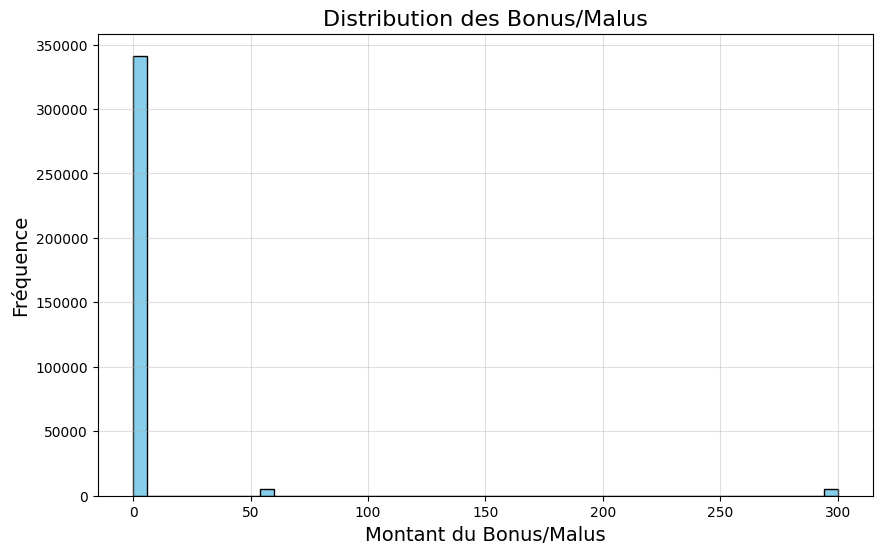

In [4]:
# Distribution des bonus/malus
plt.figure(figsize=(10, 6))
bonus_malus_data['Bonus_Malus'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution des Bonus/Malus", fontsize=16)
plt.xlabel("Montant du Bonus/Malus", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.grid(alpha=0.4)
plt.show()

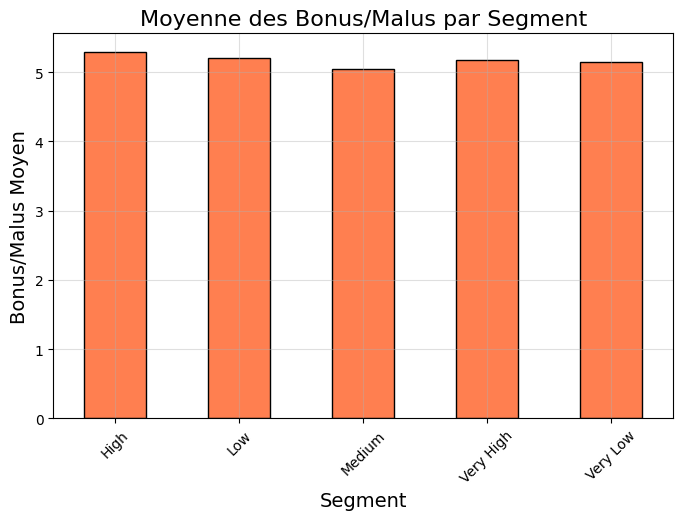

In [5]:
# Moyenne des Bonus/Malus par segment
average_bonus_by_segment = bonus_malus_data.groupby('Segment')['Bonus_Malus'].mean()

# Visualisation
average_bonus_by_segment.plot(kind='bar', color='coral', figsize=(8, 5), edgecolor='black')
plt.title("Moyenne des Bonus/Malus par Segment", fontsize=16)
plt.xlabel("Segment", fontsize=14)
plt.ylabel("Bonus/Malus Moyen", fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.show()

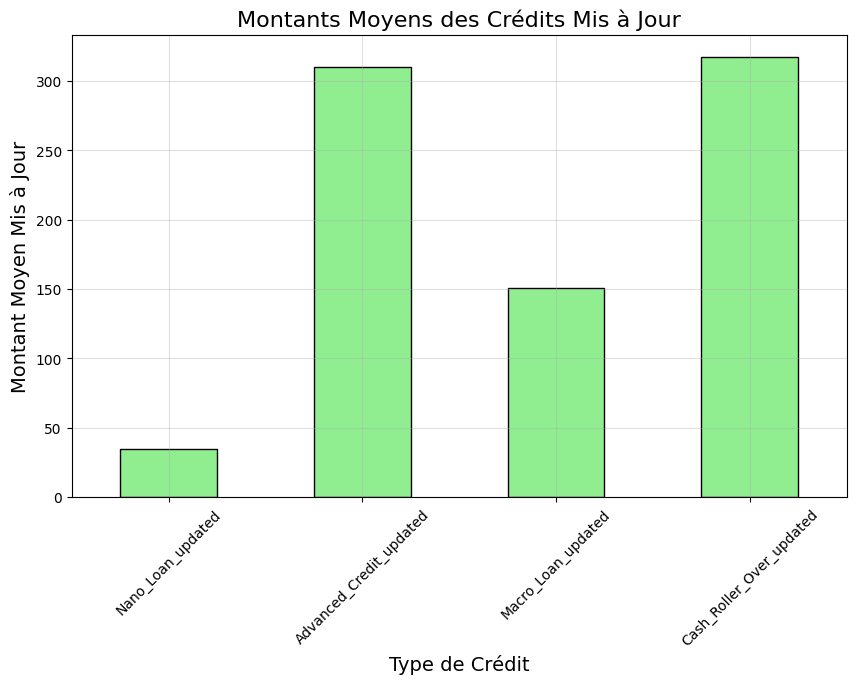

In [6]:
# Moyenne des montants mis à jour par type de crédit
credit_columns = [
    "Nano_Loan_updated", "Advanced_Credit_updated", 
    "Macro_Loan_updated", "Cash_Roller_Over_updated"
]
updated_loans_mean = updated_loans_data[credit_columns].mean()

# Visualisation
updated_loans_mean.plot(kind='bar', color='lightgreen', figsize=(10, 6), edgecolor='black')
plt.title("Montants Moyens des Crédits Mis à Jour", fontsize=16)
plt.xlabel("Type de Crédit", fontsize=14)
plt.ylabel("Montant Moyen Mis à Jour", fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.show()